# Working with Time Series

* Ref: [https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html)


* Time stamps: 某個特定的時刻
* Time intervals 某段介於起點與終點的時間區間
* periods: 某種特別的 time intervals 擁有相同的時間區間，且 time intervals 之間彼此不重疊
* Time deltas (durations): 時間的長度

## Dates and Times in Python

### Native Python dates and times: `datetime` and `dateutil`

* `datetime` 模組是 python 內建的，`dateutil` 模組是第三方提供的
* [https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)
* [http://labix.org/python-dateutil](http://labix.org/python-dateutil)
* pytz 可以處理 time zone 的問題: [http://pytz.sourceforge.net/](http://pytz.sourceforge.net/)

In [1]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [2]:
from dateutil import parser
# 可以用各式各樣的方式來表示時間，parser 會轉成正確的 datetime 格式
date = parser.parse('4th of July, 2015')
date

datetime.datetime(2015, 7, 4, 0, 0)

In [3]:
date.strftime('%A') # string format time, %A 表示 weekday 的名字

'Saturday'

### Typed arrays of times: NumPy's `datetime64`

* `datetime64` 是 Numpy 用來處理 date 格式的物件
  * 是用 64-bit 整數儲存，所以精度是 64-bit ($2^{64}$ 倍的基本時間單位)
  * 基本時間單位是由 `datetime64` 看輸入的格式使怎樣來自動決定的
  * 輸入時有固定的格式
  * 執行起來比較快
  * time zone 是看電腦在哪個 time zone
* [https://numpy.org/doc/stable/reference/arrays.datetime.html](https://numpy.org/doc/stable/reference/arrays.datetime.html)

|Code|Meaning|
|:---:|:---|
|`Y`|Year|
|`M`|Month|
|`W`|Week|
|`D`|Day|
|`h`|Hour|
|`m`|Minute|
|`s`|Second|
|`ms`|Millisecond|
|`us`|Microsecond|
|`ns`|Nanosecond|
|`ps`|Picosecond|
|`fs`|Femtosecond|
|`as`|Attosecond|

In [5]:
import numpy as np
# 要用 YYYY-mm-dd 然後要指名 dtype=np.datetime64
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [7]:
# 以 date 為第一天，產生 12 天的 np array
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [8]:
np.datetime64('2015-07-04') # 基本時間單位是 day

numpy.datetime64('2015-07-04')

In [9]:
np.datetime64('2015-07-04 12:00') # 基本時間單位是分鐘

numpy.datetime64('2015-07-04T12:00')

In [11]:
np.datetime64('2015-07-04 12:59:59.50', 'ns') # 基本時間單位是 nanosecond

numpy.datetime64('2015-07-04T12:59:59.500000000')

### Dates and times in pandas: best of both worlds

* `Timestamp` 結合了 `datetime`, `dateutil` 和 `datetime64` 的優點

In [12]:
import pandas as pd
date = pd.to_datetime('4th of July, 2015')
date

Timestamp('2015-07-04 00:00:00')

In [13]:
date.strftime('%A')

'Saturday'

In [15]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Pandas Time Series: Indexing by Time

In [16]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [17]:
data['2014-07-04' : '2015-07-04'] # 包含 end 的日期

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [19]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## Pandas Time Series Data Structures
* `Timestamp` 的 index 結構是 `DatetimeIndex`
  * 是 pandas 中最基本的 datetime 物件
  * 可以直接產生該型態的物件，或是用 `pd.to_dateime()` 來產生
    * `pd.to_dateime()` 可以用各種時間格式當參數，會自動判斷
    * `pd.to_dateime()` 放入一個日期就產生 `Timestamp` 物件，放入一個列表就產生 `DatetimeIndex` 物件
  * `DatetimeIndex` 物件可以用 `to_period(頻率)` 轉成 `Period` 物件
* `Period` 的 index 結構是 `PeriodIndex`
* `Timedelta` 的 index 結構是 `TimedeltaIndex`

In [20]:
# 各種時間格式
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [21]:
dates.to_period('D') # 指定以 day 當頻率

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [22]:
dates - dates[0] # 產生 Timedelta 物件

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Regular sequences: `pd.date_range()`

* `pd.date_range()` for timestamps
  * 預設的時間頻率是 day
* `pd.period_range()` for periods
* `pd.timedelta_range()` for time deltas. 

In [24]:
pd.date_range('2015-07-03', '2015-07-10') # 指定起始和結束日期，包含結束日期

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [25]:
pd.date_range('2015-07-03', periods=8) # 指定起始和要有幾個週期，包含起始日期

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [26]:
pd.date_range('2015-07-03', periods=8, freq='H') # 指定起始和要有幾個週期，包含起點

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [27]:
pd.period_range('2015-07-03', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [28]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

## Frequencies and Offsets

|Code|Description|Code|Description|Code|Description|Code|Description|
|:---:|:---|:---:|:---|:---:|:---|:---:|:---|
|D|Calendar day|||B|Business day|||
|W|Weekly|
|M|Month end|MS|Month start|BM|Business month end|BMS|Business month start|
|Q|Quarter end|QS|Quarter start|BQ|Business quarter end|BQS|Business quarter start|
|A|Year end|AS|Year start|BA|Business year end|BAS|Business year start|
|H|Hours|||BH|Business hours|||
|T|Minutes|S|Seconds|L|Milliseonds|U|Microseconds|
|N|nanoseconds|

* W, M, Q, A, BM, BQ, BA 預設都是用最後一天的日期，可以加上 S 改成用第一天的日期
* W 可以指定要從哪一天當一週的開始，例如: `W-SUN`, `W-MON`, `W-TUE`, `W-WED`
* Q, BQ, A, BA 可以指定要從哪個月當作開始或結束，例如: 
  * `Q-JAN`, `BQ-FEB`, `QS-MAR`, `BQS-APR`
  * `A-JAN`, `BA-FEB`, `AS-MAR`, `BAS-APR`
* 這些 codes 還可以加上數字，例如: 2H30T
* 這些 codes 是 `pd.tseries.offsets`

		


In [29]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [31]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

## Resampling, Shifting, and Windowing

* `pandas-datareader` 套件
  * `conda install pandas-datareader`
  * 用來輸入各種來源的 finance data，像是從 Yahoo finance 或 Google Finance 等等的

In [38]:
from pandas_datareader import data
# 從 Yahoo finance 讀 Google 的股價
goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


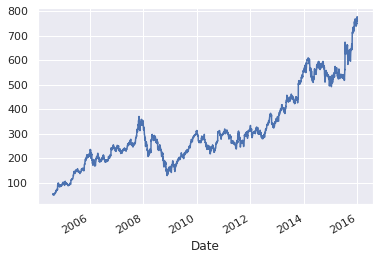

In [39]:
goog = goog['Close'] # 只使用 close price

# visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

goog.plot()
plt.show()

### Resampling and converting frequencies

* 要做 resample 可以用:
  * `resample()`: 本質上是做 data aggregation
  * `asfreq()`: 本質上是做 data selection
* resample 有分成:
  * down-sampling: 時間頻率會變大，例如 D 變 W, M 變 A
  * up-sampling: 時間頻率會變小，例如 W 變 D, A 變 M
    * 預設上會把 up-sampling 後多出來的部分填入 NaN
    * `resample()` 和 `asfreq()` 都可以提供方法來決定該怎麼填補 NaN

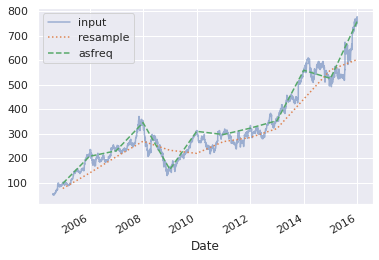

In [40]:
goog.plot(alpha=0.5, style='-')
# 用每個 business year 結束的日期當 resample 後的日期
goog.resample('BA').mean().plot(style=':') # 因為 resample() 是做 data aggregation，所以要提供 aggregation functions
goog.asfreq('BA').plot(style='--'); # asfreq() 直接選用 BA 最後一天的數值
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left')
plt.show()

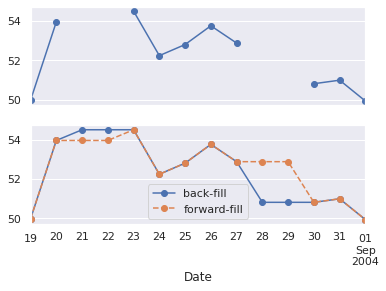

In [42]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o') # bfill 就是用下一個非 NaN 值來填補
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o') # ffill 就是用前一個非 NaN 值來填補
ax[1].legend(["back-fill", "forward-fill"])
plt.show()

In [44]:
data

Date
2004-08-19    49.982655
2004-08-20    53.952770
2004-08-23    54.495735
2004-08-24    52.239193
2004-08-25    52.802086
2004-08-26    53.753517
2004-08-27    52.876804
2004-08-30    50.814533
2004-08-31    50.993862
2004-09-01    49.937820
Name: Close, dtype: float64

In [45]:
data.asfreq('D')

Date
2004-08-19    49.982655
2004-08-20    53.952770
2004-08-21          NaN
2004-08-22          NaN
2004-08-23    54.495735
2004-08-24    52.239193
2004-08-25    52.802086
2004-08-26    53.753517
2004-08-27    52.876804
2004-08-28          NaN
2004-08-29          NaN
2004-08-30    50.814533
2004-08-31    50.993862
2004-09-01    49.937820
Freq: D, Name: Close, dtype: float64

In [46]:
data.asfreq('D', method='bfill')

Date
2004-08-19    49.982655
2004-08-20    53.952770
2004-08-21    54.495735
2004-08-22    54.495735
2004-08-23    54.495735
2004-08-24    52.239193
2004-08-25    52.802086
2004-08-26    53.753517
2004-08-27    52.876804
2004-08-28    50.814533
2004-08-29    50.814533
2004-08-30    50.814533
2004-08-31    50.993862
2004-09-01    49.937820
Freq: D, Name: Close, dtype: float64

In [47]:
data.asfreq('D', method='ffill')

Date
2004-08-19    49.982655
2004-08-20    53.952770
2004-08-21    53.952770
2004-08-22    53.952770
2004-08-23    54.495735
2004-08-24    52.239193
2004-08-25    52.802086
2004-08-26    53.753517
2004-08-27    52.876804
2004-08-28    52.876804
2004-08-29    52.876804
2004-08-30    50.814533
2004-08-31    50.993862
2004-09-01    49.937820
Freq: D, Name: Close, dtype: float64

### Time-shifts

* 有兩種方式可以 shift data
  * `shift()`: shifts the data
  * `tshift()`: shifts the index 

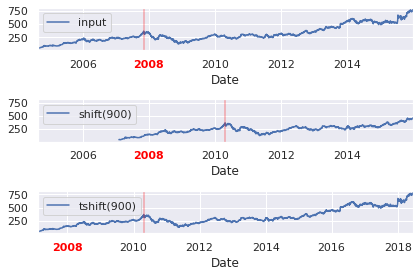

In [43]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1]) # index 不變，但是數值往後移 900 個單位
goog.tshift(900).plot(ax=ax[2]) # 數值不變，但是 index 加上 900 個單位 (相當於往前移 900 個單位)

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red') # 第二個座標值用紅色粗體字
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

plt.tight_layout()
plt.show()

In [49]:
data

Date
2004-08-19    49.982655
2004-08-20    53.952770
2004-08-23    54.495735
2004-08-24    52.239193
2004-08-25    52.802086
2004-08-26    53.753517
2004-08-27    52.876804
2004-08-30    50.814533
2004-08-31    50.993862
2004-09-01    49.937820
Name: Close, dtype: float64

In [51]:
data.asfreq('D')

Date
2004-08-19    49.982655
2004-08-20    53.952770
2004-08-21          NaN
2004-08-22          NaN
2004-08-23    54.495735
2004-08-24    52.239193
2004-08-25    52.802086
2004-08-26    53.753517
2004-08-27    52.876804
2004-08-28          NaN
2004-08-29          NaN
2004-08-30    50.814533
2004-08-31    50.993862
2004-09-01    49.937820
Freq: D, Name: Close, dtype: float64

In [52]:
data.asfreq('D').shift(3)

Date
2004-08-19          NaN
2004-08-20          NaN
2004-08-21          NaN
2004-08-22    49.982655
2004-08-23    53.952770
2004-08-24          NaN
2004-08-25          NaN
2004-08-26    54.495735
2004-08-27    52.239193
2004-08-28    52.802086
2004-08-29    53.753517
2004-08-30    52.876804
2004-08-31          NaN
2004-09-01          NaN
Freq: D, Name: Close, dtype: float64

In [53]:
data.asfreq('D').tshift(3)

Date
2004-08-22    49.982655
2004-08-23    53.952770
2004-08-24          NaN
2004-08-25          NaN
2004-08-26    54.495735
2004-08-27    52.239193
2004-08-28    52.802086
2004-08-29    53.753517
2004-08-30    52.876804
2004-08-31          NaN
2004-09-01          NaN
2004-09-02    50.814533
2004-09-03    50.993862
2004-09-04    49.937820
Freq: D, Name: Close, dtype: float64

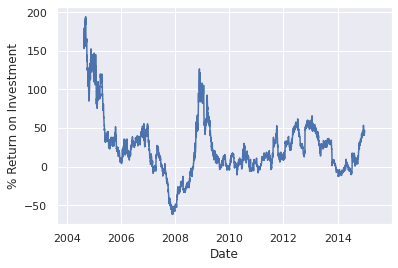

In [57]:
ROI = 100 * (goog.tshift(-365) / goog - 1) # goog.tshift(-365) 會得到一年前的 index
ROI.plot()
plt.ylabel('% Return on Investment')
plt.show()

### Rolling windows

* `rolling()`: 類似 `groupby`
  * 可以使用內建的 aggregation functions 或是利用 `aggregate()` 和 `apply()` 來執行自訂的函數

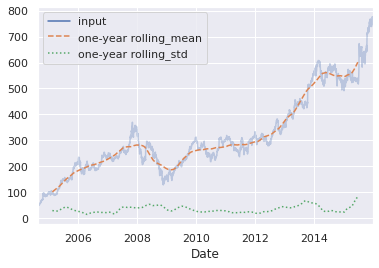

In [58]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)
plt.show()

## Example: Visualizing Seattle Bicycle Counts

我無法下載 FremontBridge.csv

In [ ]:
data = pd.read_csv('FremontBridge.csv',
                   index_col='Date',
                   parse_dates=True)
data.head()

In [ ]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

In [ ]:
data.dropna().describe()

In [ ]:
# Visualizing the data
%matplotlib inline
import seaborn
seaborn.set()

data.plot()
plt.ylabel('Hourly Bicycle Count')
plt.show()

* 太多資料了，所以改用 resample 過後的來畫圖

In [ ]:
weekly = data.resample('W').sum()

weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')
plt.show()

In [ ]:
daily = data.resample('D').sum()

daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')
plt.show()

* resample 過後仍然呈現鋸齒狀，可以用 gaussian window 來變平滑一點

In [ ]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])

In [ ]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6) # data.index 的時間單位是秒，這邊換算成每 4 小時
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])
plt.show()

In [ ]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])
plt.show()

In [ ]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.ix['Weekday'].plot(ax=ax[0],
                           title='Weekdays',
                           xticks=hourly_ticks,
                           style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1],
                           title='Weekends',
                           xticks=hourly_ticks,
                           style=[':', '--', '-'])
plt.show()